In [1]:
import xlrd
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 第一题

In [3]:
date1 = pd.read_excel("C:/Users/柠檬/Desktop/第3章 数据整理与显示.xls", sheet_name = 0)

In [4]:
date1

,编号,满意度,代码
0,1,比较满意,4
1,2,非常满意,5
2,3,比较满意,4
3,4,非常满意,5
4,5,非常满意,5
...,...,...,...
295,296,比较满意,4
296,297,比较满意,4
297,298,比较满意,4
298,299,比较满意,4


In [5]:
date2 = pd.read_excel("C:/Users/柠檬/Desktop/第3章 数据整理与显示.xls", sheet_name = 1)

In [6]:
date2

,编号,工资
0,27,2300
1,13,2400
2,11,2500
3,30,2500
4,44,2600
5,31,2700
6,32,2700
7,8,2800
8,3,3000
9,16,3000


In [7]:
date3 = pd.read_excel("C:/Users/柠檬/Desktop/第3章 数据整理与显示.xls", sheet_name = 2)

In [8]:
date3

,编号,等红灯的时候做什么,代码
0,1,静静等待红灯,7
1,2,静静等待红灯,7
2,3,打电话,2
3,4,静静等待红灯,7
4,5,听音乐,5
...,...,...,...
121,122,听音乐,5
122,123,静静等待红灯,7
123,124,静静等待红灯,7
124,125,静静等待红灯,7


## 分类汇总

### 汇总表1

In [9]:
group1 = date1.groupby("满意度")
group1.size()

满意度
一般        56
比较不满意     31
比较满意     132
非常不满意      4
非常满意      77
dtype: int64

### 汇总表2

In [10]:
date = pd.cut(date2['工资'],bins=[2300, 2499, 3999, 5499, 6999, 8499, 9999, 13000],
                     right=False, labels=['2300-2499' , '2500-3999', '4000-5499', '5500-6999', '7000-8499', '8500-9999', '10000-12999'])
pd.value_counts(date)

2500-3999      17
4000-5499      12
5500-6999       7
7000-8499       3
2300-2499       2
8500-9999       2
10000-12999     2
Name: 工资, dtype: int64

### 汇总表3

In [11]:
group3 = date3.groupby("等红灯的时候做什么")
group3.size()

等红灯的时候做什么
其他              5
听音乐             7
手机上网            6
手机打游戏           2
打电话             6
拿出手机，无目的地翻看    13
看报纸、杂志等         2
静静等待红灯         85
dtype: int64

### 数据透视表1

In [12]:
date = date1
date = date.rename(columns={"编号":"汇总"})
pd1 = pd.pivot_table(date,index="满意度",values=["汇总"],aggfunc=np.count_nonzero,margins=True)
pd1

,汇总
满意度,
一般,56
比较不满意,31
比较满意,132
非常不满意,4
非常满意,77
All,300


### 数据透视表2

In [13]:
date = pd.cut(date2['工资'],bins=[2300, 2499, 3999, 5499, 6999, 8499, 9999, 13000],
                     right=False, labels=['2300-2499' , '2500-3999', '4000-5499', '5500-6999', '7000-8499', '8500-9999', '10000-12999'])
date = {'工资':date,'汇总':date}
date = DataFrame(date)
pd2 = pd.pivot_table(date,index="工资",aggfunc=np.count_nonzero,margins=True)
pd2

,汇总
工资,
2300-2499,2
2500-3999,17
4000-5499,12
5500-6999,7
7000-8499,3
8500-9999,2
10000-12999,2
All,45


### 数据透视表3

In [14]:
date = date3
date = date.rename(columns={"编号":"汇总"})
pd3 = pd.pivot_table(date,index="等红灯的时候做什么",values=["汇总"],aggfunc=np.count_nonzero,margins=True)
pd3

,汇总
等红灯的时候做什么,
其他,5
听音乐,7
手机上网,6
手机打游戏,2
打电话,6
拿出手机，无目的地翻看,13
看报纸、杂志等,2
静静等待红灯,85
All,126


### 直方图1

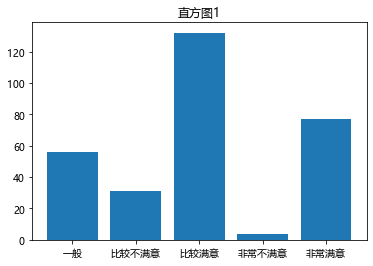

In [15]:
# pd1.values[:,0]
plt.bar(['一般','比较不满意','比较满意','非常不满意','非常满意'],pd1.values[0:5,0])
plt.title('直方图1')
plt.show()

### 直方图2

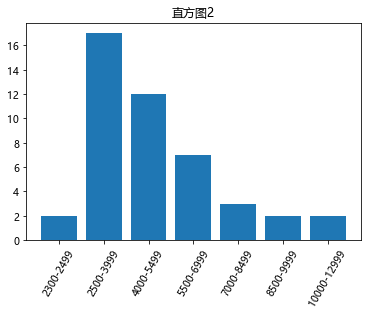

In [16]:
plt.bar(['2300-2499' , '2500-3999', '4000-5499', '5500-6999', '7000-8499', '8500-9999', '10000-12999'],pd2.values[0:7,0])
plt.xticks(rotation=60)
plt.title('直方图2')
plt.show()

### 直方图3

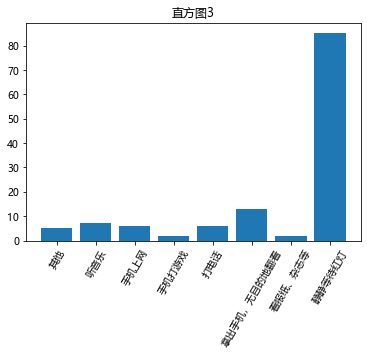

In [17]:
plt.bar(['其他','听音乐','手机上网','手机打游戏','打电话','拿出手机，无目的地翻看','看报纸、杂志等','静静等待红灯'],pd3.values[0:8,0])
plt.xticks(rotation=60)
plt.title('直方图3')
plt.show()

### 频数统计图1

Text(0.5, 1.0, '频数统计图1')

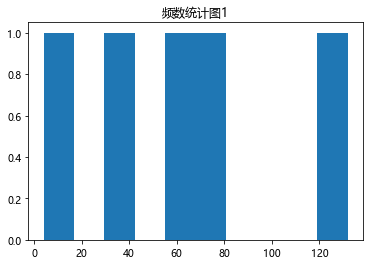

In [18]:
plt.hist(pd1.values[0:5,0])
plt.title('频数统计图1')

### 频数统计图2

Text(0.5, 1.0, '频数统计图2')

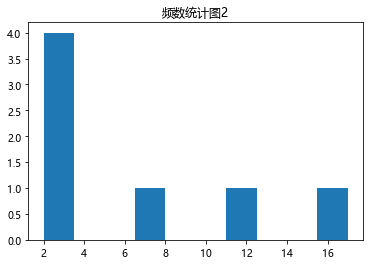

In [19]:
plt.hist(pd2.values[0:7,0])
plt.title('频数统计图2')

### 频数统计图3

Text(0.5, 1.0, '频数统计图3')

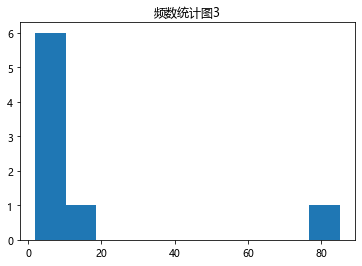

In [20]:
plt.hist(pd3.values[0:8,0])
plt.title('频数统计图3')

# 第二题

## 第一问

In [21]:
makeup = pd.read_excel("C:/Users/柠檬/Desktop/Makeup2007.xls", sheet_name = 0)
makeup

,Transaction number,Name,Date,Product,Units,Dollars,Location
0,1,Betsy,38078,lip gloss,45,137.204558,south
1,2,Hallagan,38056,foundation,50,152.007303,midwest
2,3,Ashley,38408,lipstick,9,28.719483,midwest
3,4,Hallagan,38859,lip gloss,55,167.075323,west
4,5,Zaret,38155,lip gloss,43,130.602872,midwest
...,...,...,...,...,...,...,...
1886,1887,Ashley,38397,foundation,36,109.842599,east
1887,1888,Colleen,38661,lip gloss,46,140.408899,west
1888,1889,Zaret,38001,lipstick,72,217.835886,west
1889,1890,Hallagan,39024,eye liner,28,85.656830,south


### 每位销售人员销售每种产品的数量与销售额

In [22]:
table1 = pd.pivot_table(makeup,index=["Name"],
               values=["Dollars"],
               aggfunc=[np.count_nonzero,np.sum],fill_value=0,margins=True)
table1

,count_nonzero,sum
,Dollars,Dollars
Name,,
Ashley,197,25947.235264
Betsy,217,28561.530281
Cici,230,27590.573172
Colleen,206,24890.655792
Cristina,207,23849.558721
Emilee,203,25079.864154
Hallagan,200,28434.692781
Jen,217,28941.178422


###  每位销售人员销售每种产品的数量与销售额

In [23]:
table2 = pd.pivot_table(makeup,index=["Name"],
               columns=["Product"],
               values=["Dollars"],
               aggfunc=[np.count_nonzero,np.sum],fill_value=0,margins=True)
table2

count_nonzero                                                \
               Dollars                                                 
Product      eye liner foundation lip gloss lipstick mascara     All   
Name                                                                   
Ashley              41         35        48       23      50   197.0   
Betsy               43         49        53       30      42   217.0   
Cici                53         54        48       21      54   230.0   
Colleen             33         52        42       26      53   206.0   
Cristina            43         53        47       18      46   207.0   
Emilee              57         41        48       15      42   203.0   
Hallagan            50         45        43       21      41   200.0   
Jen                 54         46        42       29      46   217.0   
Zaret               62         51        41       24      36   214.0   
All                436        426       412      207     410  1891.0   

                   sum                                            \
               Dollars                                             
Product      eye liner    foundation     lip gloss      lipstick   
Name                                                               
Ashley     5844.948744   4186.058628   6053.684565   3245.442978   
Betsy      6046.534282   8043.486462   5675.650045   3968.605496   
Cici       5982.823291   6198.248632   5199.949201   3148.840650   
Colleen    3389.625314   6834.767608   5573.323725   2346.413777   
Cristina   5397.273636   5290.989935   5297.979810   2401.668343   
Emilee     7587.388980   5313.787561   5270.250313   2189.137568   
Hallagan   6964.621074   6985.734333   5603.119378   3177.871325   
Jen        7010.440514   5628.648036   5461.614790   3953.300132   
Zaret      8166.749063   6451.650057   5670.329329   2448.707163   
All       56390.404898  54933.371253  49805.901157  26879.987434   

                                       
                                       
Product        mascara            All  
Name                                   
Ashley     6617.100349   25947.235264  
Betsy      4827.253996   28561.530281  
Cici       7060.711397   27590.573172  
Colleen    6746.525368   24890.655792  
Cristina   5461.646997   23849.558721  
Emilee     4719.299731   25079.864154  
Hallagan   5703.346670   28434.692781  
Jen        6887.174950   28941.178422  
Zaret      3879.949944   26617.385557  
All       51903.009403  239912.674144

## 第二问

### 汇总各销售点每位销售人员的销量比例

In [24]:
table3 = pd.pivot_table(makeup,index=["Location"],
               values=["Name"],
               aggfunc=[np.count_nonzero],fill_value=0,margins=True)
table3.div(table3[0:4].sum(axis=0), axis=1)

,count_nonzero
,Name
Location,
east,0.241142
midwest,0.224220
south,0.275516
west,0.259122
All,1.000000


### 汇总各销售点每位销售人员的销售额和销售数量。

In [25]:
table4 = pd.pivot_table(makeup,index=["Location"],
               columns=["Name"],
               values=["Dollars"],
               aggfunc=[np.count_nonzero,np.sum],fill_value=0,margins=True)
table4

count_nonzero                                                         \
               Dollars                                                          
Name            Ashley Betsy Cici Colleen Cristina Emilee Hallagan  Jen Zaret   
Location                                                                        
east                51    65   50      46       40     50       42   53    59   
midwest             40    43   60      53       50     44       42   52    40   
south               58    55   68      61       59     55       61   50    54   
west                48    54   52      46       58     54       55   62    61   
All                197   217  230     206      207    203      200  217   214   

                           sum                                            \
                       Dollars                                             
Name         All        Ashley         Betsy          Cici       Colleen   
Location                                                                   
east       456.0   7772.704761   8767.431725   5956.320446   5713.069445   
midwest    424.0   4985.896509   4878.085848   8129.619289   6586.142169   
south      521.0   7398.565792   7732.056980   7174.448975   7785.632708   
west       490.0   5790.068203   7183.955727   6330.184462   4805.811471   
All       1891.0  25947.235264  28561.530281  27590.573172  24890.655792   

                                                                  \
                                                                   
Name          Cristina        Emilee      Hallagan           Jen   
Location                                                           
east       4126.268644   6295.472056   4965.615813   6949.209483   
midwest    5870.034488   5642.196163   7378.321391   6381.320681   
south      5964.158473   6050.594346   8210.814251   7116.016774   
west       7889.097115   7091.601589   7879.941325   8494.631484   
All       23849.558721  25079.864154  28434.692781  28941.178422   

                                       
                                       
Name             Zaret            All  
Location                               
east       6825.995148   57372.087521  
midwest    4953.797616   54805.414156  
south      6864.065862   64296.354161  
west       7973.526930   63438.818306  
All       26617.385557  239912.674144

# 第三题

In [26]:
histogram = pd.read_excel("C:/Users/柠檬/Desktop/Histogram.xlsx", sheet_name = 0)
histogram

,Date,Cakes
0,2013-01-01,79
1,2013-01-02,91
2,2013-01-03,47
3,2013-01-04,89
4,2013-01-05,112
...,...,...
1090,2015-12-27,136
1091,2015-12-28,77
1092,2015-12-29,93
1093,2015-12-30,62


In [27]:
date = pd.cut(histogram['Date'],bins=[np.datetime64('2013-01-01'), np.datetime64('2013-07-01'),
                                      np.datetime64('2014-01-01'),np.datetime64('2014-07-01'),
                                      np.datetime64('2015-01-01'),np.datetime64('2015-07-01'),
                                      np.datetime64('2016-01-01')],
                     right=False)
date = DataFrame(date)
histogram['Date'] = date
histogram

,Date,Cakes
0,"[2013-01-01, 2013-07-01)",79
1,"[2013-01-01, 2013-07-01)",91
2,"[2013-01-01, 2013-07-01)",47
3,"[2013-01-01, 2013-07-01)",89
4,"[2013-01-01, 2013-07-01)",112
...,...,...
1090,"[2015-07-01, 2016-01-01)",136
1091,"[2015-07-01, 2016-01-01)",77
1092,"[2015-07-01, 2016-01-01)",93
1093,"[2015-07-01, 2016-01-01)",62


In [28]:
table = pd.pivot_table(histogram,index="Date",aggfunc=np.mean)
table

,Cakes
Date,
"[2013-01-01, 2013-07-01)",81.524862
"[2013-07-01, 2014-01-01)",82.157609
"[2014-01-01, 2014-07-01)",85.861878
"[2014-07-01, 2015-01-01)",87.923913
"[2015-01-01, 2015-07-01)",88.878453
"[2015-07-01, 2016-01-01)",91.293478


### 蛋糕销售数量直方图

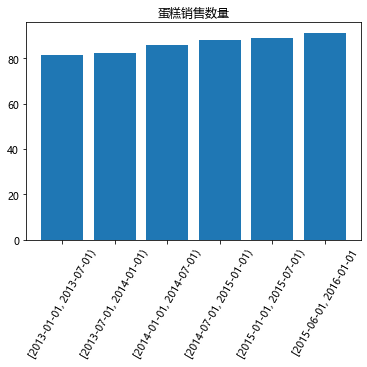

In [29]:
plt.bar(['[2013-01-01, 2013-07-01)','[2013-07-01, 2014-01-01)','[2014-01-01, 2014-07-01)','[2014-07-01, 2015-01-01)',
         '[2015-01-01, 2015-07-01)','[2015-06-01, 2016-01-01'],table.values[0:6,0])
plt.xticks(rotation=60)
plt.title('蛋糕销售数量')
plt.show()